In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
from matplotlib.cm import coolwarm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
grocery = pd.read_csv('grocerydb.csv')
grocery.head()

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3.0,2.79,0.055973,90.7184,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0.0,2.49,0.019213,90.7184,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3.0,4.99,0.017781,396.8930,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051


In [3]:
grocery['category'].unique()

array(['baby-food', 'baking', 'bread', 'breakfast', 'cakes', 'cereal',
       'cheese', 'coffee-beans-wf', 'cookies-biscuit',
       'culinary-ingredients', 'dairy-yogurt-drink', 'dressings',
       'drink-coffee', 'drink-juice', 'drink-juice-wf',
       'drink-shakes-other', 'drink-soft-energy-mixes', 'drink-tea',
       'drink-water-wf', 'eggs-wf', 'ice-cream-dessert', 'jerky',
       'mac-cheese', 'meat-packaged', 'meat-poultry-wf',
       'milk-milk-substitute', 'muffins-bagels', 'nuts-seeds-wf',
       'pasta-noodles', 'pastry-chocolate-candy', 'pizza',
       'prepared-meals-dishes', 'produce-beans-wf', 'produce-packaged',
       'pudding-jello', 'rice-grains-packaged', 'rice-grains-wf',
       'rolls-buns-wraps', 'salad', 'sauce-all', 'sausage-bacon',
       'seafood', 'seafood-wf', 'snacks-bars', 'snacks-chips',
       'snacks-dips-salsa', 'snacks-mixes-crackers', 'snacks-nuts-seeds',
       'snacks-popcorn', 'soup-stew', 'spices-seasoning',
       'spread-squeeze'], dtype=obje

In [ ]:
category_mapping = {
    # Grains & Pasta
    'pasta-noodles': 'Grains & Pasta',
    'rice-grains-packaged': 'Grains & Pasta',
    'cereal': 'Grains & Pasta',
    
    # Dairy Products
    'cheese': 'Dairy Products',
    'dairy-yogurt-drink': 'Dairy Products',
    'milk-milk-substitute': 'Dairy Products',
    
    # Proteins
    'meat-packaged': 'Proteins',
    'jerky': 'Proteins',
    'seafood': 'Proteins',
    'sausage-bacon': 'Proteins',
    
    # Fruits & Vegetables
    'produce-packaged': ' Packaged Fruits & Vegetables',
    
    # Snacks
    'ice-cream-dessert': 'Snacks & Sweets',
    'snacks-bars': 'Snacks & Sweets',
    'snacks-chips': 'Snacks & Sweets',
    'snacks-dips-salsa': 'Snacks & Sweets',
    'snacks-mixes-crackers': 'Snacks & Sweets',
    'snacks-nuts-seeds': 'Snacks & Sweets',
    'snacks-popcorn': 'Snacks & Sweets',
    'pastry-chocolate-candy': 'Snacks & Sweets',
    'pudding-jello': 'Snacks & Sweets',

    # Baked Goods
    'cookies-biscuit': 'Baked Goods',
    'cakes': 'Baked Goods',
    'baking': 'Baked Goods',
    'bread': 'Baked Goods',
    'muffins-bagels': 'Baked Goods',
    'rolls-buns-wraps': 'Baked Goods',

    # Drinks & Beverages
    'drink-coffee': 'Beverages',
    'drink-juice': 'Beverages',
    'drink-shakes-other': 'Beverages',
    'drink-soft-energy-mixes': 'Beverages',
    'drink-tea': 'Beverages',
    
    # Prepared Foods
    'prepared-meals-dishes': 'Prepared Foods',
    'salad': 'Prepared Foods',
    'pizza': 'Prepared Foods',
    'mac-cheese': 'Prepared Foods',
    'soup-stew': 'Prepared Foods',
    'baby-food': 'Prepared Foods',
    'breakfast': 'Prepared Foods',
    
    # Cooking
    'culinary-ingredients': 'Cooking',
    'spices-seasoning': 'Cooking',
    'sauce-all': 'Cooking',
    'dressings': 'Cooking',
    'spread-squeeze': 'Cooking',
        
    # Nuts & Seeds (not ending with -wf)
    'nuts-seeds': 'Nuts & Seeds'
}

grocery['general_category'] = grocery['category'].apply(
    lambda x: 'Whole Foods' if x.endswith('-wf') else category_mapping.get(x, 'Other')
)

unmapped = grocery[~grocery['category'].str.endswith('-wf') & 
                  ~grocery['category'].isin(category_mapping.keys())]['category'].unique()
if len(unmapped) > 0:
    print(f"You missed one bruh")

In [5]:
grocery

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,general_category
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.893000,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101,Prepared Foods
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.893000,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101,Prepared Foods
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3.0,2.79,0.055973,90.718400,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000,Prepared Foods
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0.0,2.49,0.019213,90.718400,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000,Prepared Foods
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3.0,4.99,0.017781,396.893000,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051,Prepared Foods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,"Sam's Choice Creamy Honey Almond Butter, 12 oz",Walmart,spread-squeeze,Sam's Choice,0.503963,2.0,4.98,0.002465,340.194000,18.750000,50.000000,25.000000,6.250000,9.375000,0.203125,0.000000,Cooking
26246,"Nutella and Go Snack Packs, Hazelnut Spread & ...",Walmart,spread-squeeze,Nutella,0.738611,3.0,4.98,NaN,NaN,7.407407,24.074074,66.666667,40.740741,3.703704,0.000000,0.011111,Cooking
26247,"Sabra Dark Chocolate Dessert Dip & Spread, 8 oz",Walmart,spread-squeeze,Sabra,0.829611,3.0,NaN,NaN,226.796000,3.571429,16.071429,35.714286,21.428571,3.571429,0.142857,0.000000,Cooking
26248,"MaraNatha, No Stir Peanut Butter, 1.15 oz Packets",Walmart,spread-squeeze,MaraNatha,0.609444,2.0,0.78,0.003828,32.601925,25.000000,53.125000,15.625000,3.125000,6.250000,0.203125,0.000000,Cooking


C:\Users\danie\AppData\Local\Temp\ipykernel_2376\441465899.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grocery,


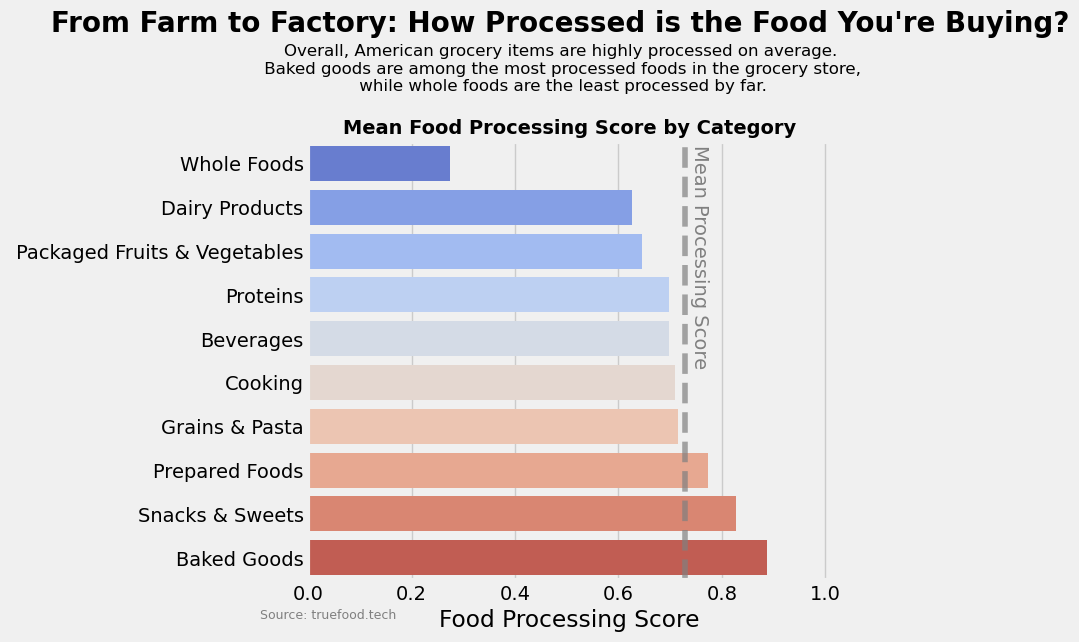

In [57]:
mean_fpro = grocery['FPro'].mean()

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=grocery, 
            y='general_category', x='FPro', 
            palette='coolwarm', 
            orient='h',
            order=grocery.groupby('general_category')['FPro'].mean().sort_values().index,
            errorbar=None, ax=ax)
ax.set_ylabel("")
ax.set_xlabel("Food Processing Score")
ax.set_xlim(0,1.01)

ax.axvline(mean_fpro, linestyle='--', color='gray', alpha=0.7, label='Mean FPro')
ax.text(mean_fpro+0.01, 4.6, 'Mean Processing Score', color='gray', rotation=270)


fig.suptitle("From Farm to Factory: How Processed is the Food You're Buying?",
             fontsize=20, fontweight='bold', y=1.02)  

fig.text(0.5, 0.885, "Overall, American grocery items are highly processed on average.\n" \
" Baked goods are among the most processed foods in the grocery store," \
"\n while whole foods are the least processed by far.",
         ha='center', fontsize=12)

plt.title("Mean Food Processing Score by Category",
          fontsize=14, fontweight='bold')  


plt.subplots_adjust(top=0.8)

fig.text(0, 0, 'Source: truefood.tech', ha='left', va='bottom', fontsize=9, color='gray')
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_2376\3537336854.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grocery,


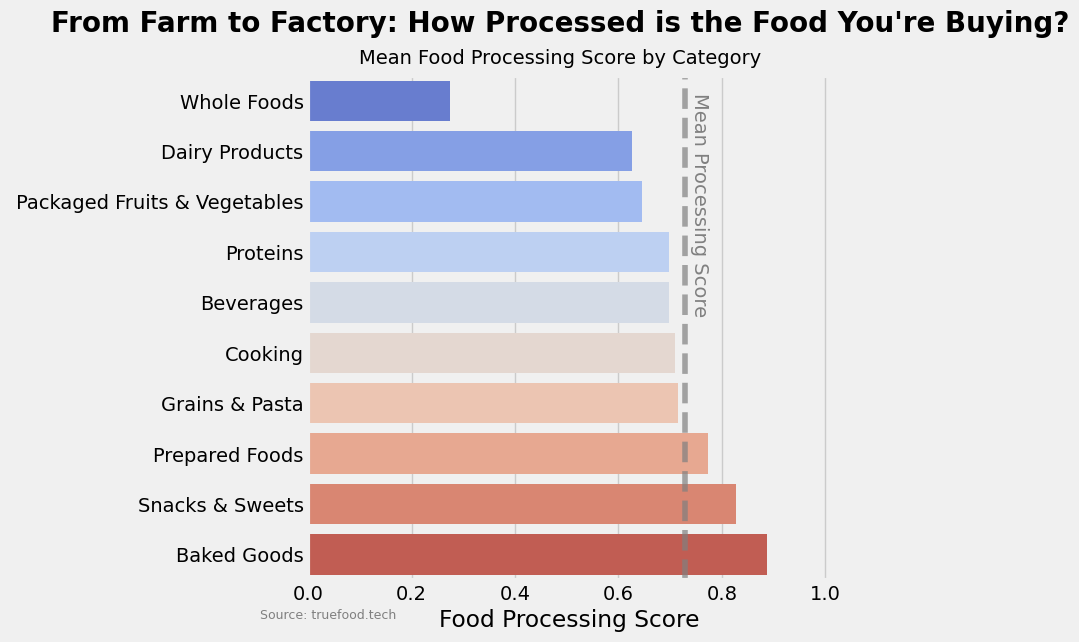

In [56]:
mean_fpro = grocery['FPro'].mean()


fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=grocery, 
            y='general_category', x='FPro', 
            palette='coolwarm', 
            orient='h',
            order=grocery.groupby('general_category')['FPro'].mean().sort_values().index,
            errorbar=None, ax=ax)
ax.set_ylabel("")
ax.set_xlabel("Food Processing Score")
ax.set_xlim(0,1.01)

ax.axvline(mean_fpro, linestyle='--', color='gray', alpha=0.7, label='Mean FPro')
ax.text(mean_fpro+0.01, 4.2, 'Mean Processing Score', color='gray', rotation=270)


fig.suptitle("From Farm to Factory: How Processed is the Food You're Buying?",
             fontsize=20, fontweight='bold', y=1.02)  

fig.text(0.5, 0.93, "Mean Food Processing Score by Category",
         ha='center', fontsize=14)



plt.subplots_adjust(top=0.91)

fig.text(0, 0, 'Source: truefood.tech', ha='left', va='bottom', fontsize=9, color='gray')
plt.show()

<Axes: xlabel='FPro_class', ylabel='count'>

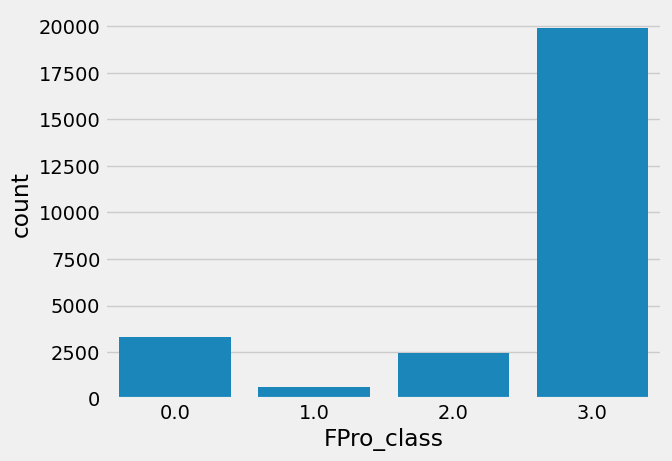

In [13]:
sns.barplot(grocery['FPro_class'].value_counts())

In [7]:
grocery.groupby('general_category')

In [54]:
grocery[grocery['category'].str.contains('-wf')]

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,general_category
3701,"100% Arabica Beans Coffee, Instant - Vienna Ro...",WholeFoods,coffee-beans-wf,365 by Whole Foods Market,0.461043,0.0,6.49,4.360537,99.22325,0.074583,0.000000,0.254167,0.0,0.0,0.002917,0.000000,Whole Foods
3702,"Ground Coffee in Bag, French Roast - Bonne Nui...",WholeFoods,coffee-beans-wf,365 by Whole Foods Market,0.064931,0.0,5.99,2.112912,283.49500,0.118333,0.020833,0.000000,0.0,0.0,0.001958,0.000000,Whole Foods
3703,"Ground Coffee in Bag, Vienna Roast - Pleasant ...",WholeFoods,coffee-beans-wf,365 by Whole Foods Market,0.045191,0.0,5.99,2.112912,283.49500,0.118333,0.020833,0.000000,0.0,0.0,0.001958,0.000000,Whole Foods
3704,"Ground Coffee in Canister, Buona Giornata - It...",WholeFoods,coffee-beans-wf,365 by Whole Foods Market,0.045191,0.0,9.99,1.236446,807.96075,0.118333,0.020833,0.000000,0.0,0.0,0.001958,0.000000,Whole Foods
3705,"Ground Coffee in Canister, Glory Days - Americ...",WholeFoods,coffee-beans-wf,365 by Whole Foods Market,0.064931,0.0,3.99,1.407432,283.49500,0.118333,0.020833,0.000000,0.0,0.0,0.001958,0.000000,Whole Foods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,"Heartland Catfish Fresh Fillets, 0.85 - 1.75 lb",Walmart,seafood-wf,Kickin' Bass,0.290056,0.0,NaN,NaN,566.99000,16.755146,5.291099,1.763700,0.0,0.0,0.039683,0.066139,Whole Foods
20577,Sam's Choice All Natural Wild Alaskan Sockeye ...,Walmart,seafood-wf,Sam's Choice,0.445114,2.0,11.94,0.024861,340.19400,21.176471,5.882353,0.000000,0.0,0.0,111.764706,0.052941,Whole Foods
20578,OYSTER 16 OZ X-SM CUP FR,Walmart,seafood-wf,FRESH SHELLFISH,0.384022,0.0,11.58,0.030397,480.00000,9.700347,2.204624,5.291099,0.0,0.0,0.105822,0.048502,Whole Foods
20579,Sam's Choice Frozen Wild Caught Cold Water Lob...,Walmart,seafood-wf,Sam's Choice,0.450688,2.0,14.74,0.040944,255.14550,15.117425,8.062626,0.000000,0.0,0.0,0.463601,0.141096,Whole Foods
